## 1 Load data

In [38]:
import os
import re

import numpy as np

def get_sort_key(filename):
    match = re.match(r'(\w+)\.(\d+)\.txt', filename)
    if match:
        name, timestamp = match.groups()
        return (name, int(timestamp))
    else:
        return (filename,)

""" 
brief: load data from folderpath
param: 
    * folderpath: path to folder containing data files
return:
    * datas: list of data
        [
            [
                [1, 2, 3],              # test 1
                [1, 2, 3],              # test 2
                ...                     # ...
            ],                          # data of node 0
            [
                [1, 2, 3],              # test 1
                [1, 2, 3],              # test 2
                ...                     # ...
            ],                          # data of node 1
            ...
        ]
"""
def load_data(folderpath):
    datas = []
    files = os.listdir(folderpath)
    files = sorted(files, key=get_sort_key)
    next_idx = 0
    multi_datas = []
    for file in files:
        idx = int(file.split(".")[0])
        if next_idx != idx:
            datas.append(multi_datas)
            multi_datas = []
            next_idx = idx
        with open(folderpath + "/" + file, "r") as f:
            data = f.readlines()
            data = [float(x) for x in data]
            multi_datas.append(data)
    datas.append(multi_datas)

    return np.array(datas)

datas = load_data("../trace/limit-rate")
print(datas.shape)
print(datas)

(3, 2, 99)
[[[0.319673 0.307343 0.296189 0.28608  0.2769   0.268547 0.260932
   0.253978 0.247617 0.241787 0.236437 0.23152  0.226993 0.22282
   0.21897  0.215411 0.21212  0.209071 0.206246 0.203624 0.201189
   0.198926 0.196822 0.194863 0.193039 0.191339 0.189753 0.188275
   0.186895 0.185606 0.184403 0.183278 0.182227 0.181244 0.180325
   0.179465 0.178661 0.177908 0.177203 0.176543 0.175925 0.175346
   0.174804 0.174296 0.17382  0.173374 0.172956 0.172564 0.172197
   0.171853 0.17153  0.171228 0.170945 0.170679 0.17043  0.170196
   0.169977 0.169771 0.169579 0.169398 0.169229 0.16907  0.168921
   0.168781 0.16865  0.168527 0.168411 0.168303 0.168202 0.168107
   0.168017 0.167934 0.167855 0.167782 0.167712 0.167648 0.167587
   0.16753  0.167476 0.167426 0.167379 0.167335 0.167294 0.167255
   0.167218 0.167184 0.167152 0.167122 0.167094 0.167067 0.167043
   0.167019 0.166997 0.166977 0.166958 0.16694  0.166923 0.166907
   0.166892]
  [0.310255 0.290475 0.273507 0.258939 0.24642  0.235

## 2 Plot data

(3, 99)


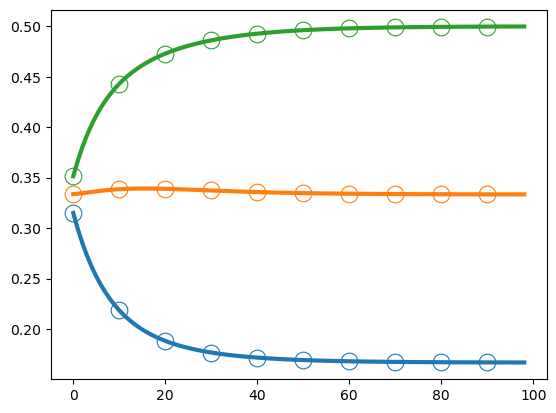

In [39]:
import matplotlib.pyplot as plt

mean = np.mean(datas, axis=1)
variance = np.var(datas, axis=1)
print(mean.shape)

def plot(mean, variance):
    plt.figure()
    for i in range(mean.shape[0]):
        plt.plot(range(mean.shape[1]), mean[i], label="MH", linewidth=3, marker="o", markevery=10, markersize=12, markerfacecolor="none", markeredgewidth=0.8)
        plt.fill_between(range(mean.shape[1]), mean[i] - variance[i], mean[i] + variance[i], alpha=0.3)
    plt.show()

plot(mean, variance)